## Deep Neural Network Classifier to Predict Type of Iris 

## Import libraries

In [33]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import urllib

import tensorflow as tf
import numpy as np
import google.datalab.bigquery as bq
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

sns.set(style="white", color_codes=True)

## Data set
From https://en.wikipedia.org/wiki/Iris_flower_data_set

3 types of Iris Flowers: 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/450px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" style="width: 100px; display:inline"/>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/800px-Iris_versicolor_3.jpg" style="width: 150px;display:inline"/>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/736px-Iris_virginica.jpg" style="width: 150px;display:inline"/>
* Iris Setosa
* Iris Versicolour
* Iris Virginica

## Data Columns:
   1. sepal length in cm 
   2. sepal width in cm 
   3. petal length in cm 
   4. petal width in cm

In [4]:
%%bq tables list

In [5]:
%%bq query -n requests
SELECT *
FROM `datascience-174316.IrisDataset.Iris`

In [24]:
#Create Pandas Dataframe. 
df = requests.execute(output_options=bq.QueryOutput.dataframe()).result()
df = df[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width", "Species"]]
df.head(3)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,4.8,3.0,1.4,0.3,setosa
1,4.8,3.0,1.4,0.1,setosa
2,4.3,3.0,1.1,0.1,setosa


In [25]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


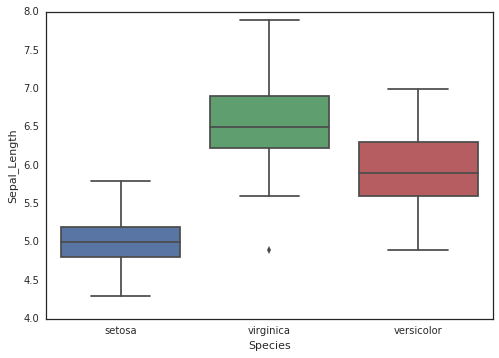

In [26]:
sns.boxplot(x="Species", y="Sepal_Length", data=df)

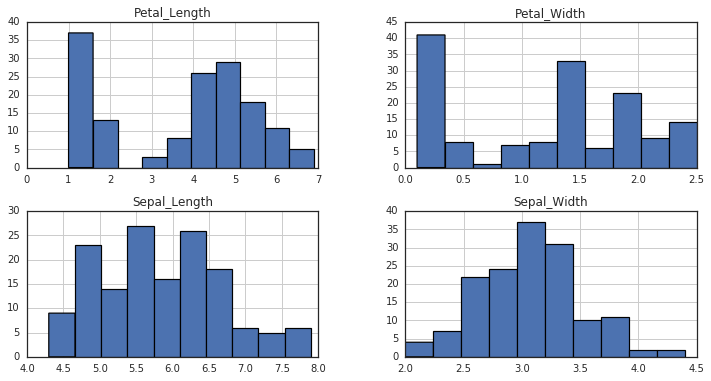

In [30]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [3]:
#Grab Datasets
IRIS_TRAINING = "iris_training.csv"
IRIS_TRAINING_URL = "http://download.tensorflow.org/data/iris_training.csv"

IRIS_TEST = "iris_test.csv"
IRIS_TEST_URL = "http://download.tensorflow.org/data/iris_test.csv"

In [4]:
# Load datasets.
training_set = tf.contrib.learn.datasets.base.load_csv_with_header(
    filename=IRIS_TRAINING,
    target_dtype=np.int,
    features_dtype=np.float32)
test_set = tf.contrib.learn.datasets.base.load_csv_with_header(
    filename=IRIS_TEST,
    target_dtype=np.int,
    features_dtype=np.float32)

## Feed Data to the Model

In [ ]:
#Create Training and Test Set
IRIS_TRAINING, IRIS_TEST = train_test_split(df, test_size=0.2)

<img src="https://i.stack.imgur.com/S0tRm.png" style="width: 400px; display:inline"/>

In [5]:
# Specify that all features have real-value data
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]

# Build 3 layer DNN with 10, 20, 10 units respectively.
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[10, 20, 10],
                                            n_classes=3,
                                            model_dir="/tmp/iris_model")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff1b7385f50>, '_model_dir': '/tmp/iris_model', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': None, '_environment': 'local', '_num_worker_replicas': 0, '_task_id': 0, '_save_summary_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_evaluation_master': '', '_master': ''}


In [6]:
# Define the test inputs
def get_train_inputs():
  x = tf.constant(training_set.data)
  y = tf.constant(training_set.target)

  return x, y

## Train our model

In [7]:
# Fit model.
classifier.fit(input_fn=get_train_inputs, steps=2000)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/iris_model/model.ckpt.
INFO:tensorflow:loss = 2.44744, step = 1
INFO:tensorflow:global_step/sec: 1468.32
INFO:tensorflow:loss = 0.140581, step = 101 (0.071 sec)
INFO:tensorflow:global_step/sec: 1211.62
INFO:tensorflow:loss = 0.079244, step = 201 (0.083 sec)
INFO:tensorflow:global_step/sec: 1457.43
INFO:tensorflow:loss = 0.0667009, step = 301 (0.067 sec)
INFO:tensorflow:global_step/sec: 1445.52
INFO:tensorflow:loss = 0.0611218, step = 401 (0.069 sec)
INFO:tensorflow:global_step/sec: 1465.07
INFO:tensorflow:loss = 0.0574471, step = 501 (0.068 sec)
INFO:tensorflow:global_s

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7ff1b7385e50>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None),), 'embedding_lr_multipliers': None, 'optimizer': None, 'dropout': None, 'gradient_clip_norm': None, 'activation_fn': <function relu at 0x7ff1c091d7d0>, 'input_layer_min_slice_size': None})

## Test Model

In [8]:
# Define the test inputs
def get_test_inputs():
  x = tf.constant(test_set.data)
  y = tf.constant(test_set.target)

  return x, y

# Evaluate accuracy.
accuracy_score = classifier.evaluate(input_fn=get_test_inputs,
                                     steps=1)["accuracy"]

print("\nTest Accuracy: {0:f}\n".format(accuracy_score))

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-10-23-13:09:25
INFO:tensorflow:Restoring parameters from /tmp/iris_model/model.ckpt-2000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2017-10-23-13:09:25
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.966667, global_step = 2000, loss = 0.0601686

Test Accuracy: 0.966667



## Inference (New Prediction)

In [9]:
# Classify two new flower samples.
def new_samples():
  return np.array(
    [[6.4, 3.2, 4.5, 1.5],
     [5.8, 3.1, 5.0, 1.7]], dtype=np.float32)

predictions = list(classifier.predict(input_fn=new_samples))

print(
    "New Samples, Class Predictions:    {}\n"
    .format(predictions))

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
INFO:tensorflow:Restoring parameters from /tmp/iris_model/model.ckpt-2000
New Samples, Class Predictions:    [1, 2]



## Exporting a model for serving predictions

In [ ]:
feature_spec = {'flower_features': tf.FixedLenFeature(shape=[4], dtype=np.float32)}

serving_fn = tf.estimator.export.build_parsing_serving_input_receiver_fn(feature_spec)

classifier.export_savedmodel(export_dir_base='/tmp/iris_model' + '/export', 
                            serving_input_receiver_fn=serving_fn)

# Estimators review

### Load datasets.

    training_data = load_csv_with_header()

### define input functions

    def input_fn(dataset)
   
### Define feature columns

    feature_columns = [tf.feature_column.numeric_column(feature_name, shape=[4])]

### Create model

    classifier = tf.estimator.LinearClassifier()

### Train

    classifier.train()

### Evaluate

    classifier.evaluate()